In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

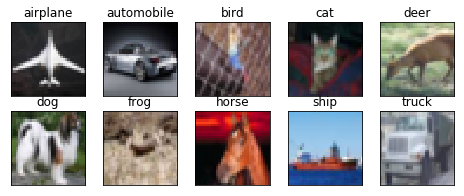

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) #30
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #15
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) #15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) #13
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #6
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) #4
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #2
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 16s 40ms/step - loss: 1.8488 - acc: 0.2924 - val_loss: 1.4494 - val_acc: 0.4668
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3432 - acc: 0.5124 - val_loss: 1.1778 - val_acc: 0.5788
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1283 - acc: 0.6013 - val_loss: 0.9985 - val_acc: 0.6424
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9935 - acc: 0.6526 - val_loss: 0.9154 - val_acc: 0.6809
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9031 - acc: 0.6882 - val_loss: 0.7967 - val_acc: 0.7206
Epoch 6/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8213 - acc: 0.7176 - val_loss: 0.7518 - val_acc: 0.7442
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7552 - acc: 0.7413 - val_loss: 0.7036 - val_acc: 0.7601
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

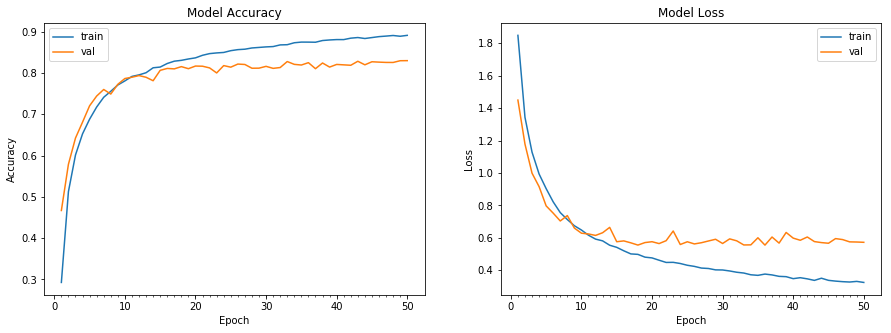

Accuracy on test data is: 83.00


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Assignment 6A - New Model

### Target Accuracy: 83%

In [0]:
# Define the model

# Model:
# Initial Convolution (16, 3, 3) + BN | Output: 32

# Conv Block 1 (3X3, same padding) + BN: 16 + 32 | Output: 32
# Transition Block 1: MaxPool + Conv (16, 1, 1) + BN + DropOut | Output: 16

# Conv Block 2 (3X3, same padding) + BN: 32 + 64 | Output: 16
# Transition Block 2: MaxPool + Conv (32, 1, 1) + BN + DropOut | Output: 8

# Conv Block 3 (3X3, same padding) + BN: 64 + 128 | Output: 8
# Transition Block 3: MaxPool + Conv (64, 1, 1) + BN + DropOut | Output: 4

# Conv Block 4 (3X3, same padding) + BN: 64 + 64 | Output: 4

# Final Conv (10, 4, 4) | Output: 1
# Flatten + Softmax

#-----------------------------------------------------------------------------------#

model = Sequential()

# Inital Conv
model.add(Convolution2D(16, 3, 3, border_mode = 'same', input_shape = (32, 32, 3))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())

# Conv Block 1: 16 + 32
model.add(Convolution2D(16, 3, 3, border_mode = 'same')) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, border_mode = 'same')) #32
model.add(Activation('relu'))
model.add(BatchNormalization())

  # Transition Block 1: MP + 16 + DO
    model.add(MaxPooling2D(pool_size = (2, 2))) #16
    model.add(Convolution2D(16, 1, 1)) #16
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

# Conv Block 2: 32 + 64
model.add(Convolution2D(32, 3, 3, border_mode = 'same')) #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode = 'same')) #16
model.add(Activation('relu'))
model.add(BatchNormalization())

  # Transition Block 2: MP + 32 + DO
    model.add(MaxPooling2D(pool_size = (2, 2))) #8
    model.add(Convolution2D(32, 1, 1)) #8
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

# Conv Block 3: 64 + 128
model.add(Convolution2D(64, 3, 3, border_mode = 'same')) #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, 3, 3, border_mode = 'same')) #8
model.add(Activation('relu'))
model.add(BatchNormalization())

  # Transition Block 3: MP + 64 + DO
    model.add(MaxPooling2D(pool_size = (2, 2))) #4
    model.add(Convolution2D(64, 1, 1)) #4
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

# Conv Block 4: 64 + 64
model.add(Convolution2D(64, 3, 3, border_mode = 'same')) #4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode = 'same')) #4
model.add(Activation('relu'))
model.add(BatchNormalization())

# Final Conv: 10 channels to bring down dimension to 1X1
model.add(Convolution2D(10, 4, 4)) #1

# Flatten + Softmax
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_258 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
activation_257 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_258 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 32, 32, 32)        4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 18s 45ms/step - loss: 1.6457 - acc: 0.4060 - val_loss: 1.3644 - val_acc: 0.5091
Epoch 2/100
390/390 [==============================] - 11s 27ms/step - loss: 1.2273 - acc: 0.5597 - val_loss: 1.1032 - val_acc: 0.6177
Epoch 3/100
390/390 [==============================] - 11s 27ms/step - loss: 1.0179 - acc: 0.6389 - val_loss: 0.9956 - val_acc: 0.6518
Epoch 4/100
390/390 [==============================] - 11s 28ms/step - loss: 0.8806 - acc: 0.6886 - val_loss: 0.8642 - val_acc: 0.6982
Epoch 5/100
390/390 [==============================] - 11s 27ms/step - loss: 0.7783 - acc: 0.7249 - val_loss: 0.7998 - val_acc: 0.7304
Epoch 6/100
390/390 [==============================] - 10s 27ms/step - loss: 0.7136 - acc: 0.7494 - val_loss: 0.7445 - val_acc: 0.7453
Epoch 7/100
390/390 [==============================] - 11s 27ms/step - loss: 0.6539 - acc: 0.7708 - val_loss: 0.7464 - val_acc: 0.7464
Epoch 8/100
390/390 [==============================] - 

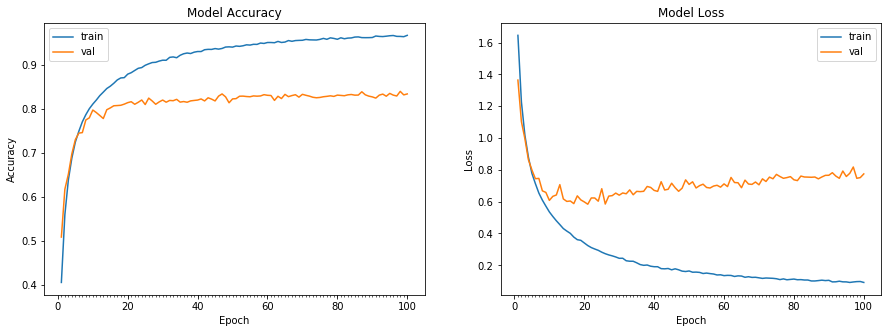

Accuracy on test data is: 83.43


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Validation Accuracy Crossed at 47<sup>th</sup> Epoch with 83.43. </br>
Best Validation accuracy reached at 98<sup>th</sup> Epoch with 84.01.